The simplest implementation of RBM without using a class.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt
%matplotlib inline
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
vb = tf.placeholder("float", [784])
hb = tf.placeholder("float", [500])
W = tf.placeholder("float", [784, 500])

X = tf.placeholder("float", [None, 784])
_h0= tf.nn.sigmoid(tf.matmul(X, W) + hb)  #probabilities of the hidden units
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0)))) #sample_h_given_X

_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1)))) #sample_v_given_h
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [3]:
alpha = 1.0
w_pos_grad = tf.matmul(tf.transpose(X), h0) ##!!!原为h0
w_neg_grad = tf.matmul(tf.transpose(v1), h1)  
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(X)[0])
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(X - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0) ##!!!原为h0

err = tf.reduce_mean(tf.square(X - v1))

Instructions for updating:
Use tf.cast instead.


In [4]:
cur_w = np.zeros([784, 500], np.float32)
cur_vb = np.zeros([784], np.float32)
cur_hb = np.zeros([500], np.float32)
prv_w = np.zeros([784, 500], np.float32)
prv_vb = np.zeros([784], np.float32)
prv_hb = np.zeros([500], np.float32)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
sess.run(err, feed_dict={X: trX, W: prv_w, vb: prv_vb, hb: prv_hb})

0.48142248

Epoch: 0 reconstruction error: 0.063018
Epoch: 1 reconstruction error: 0.054511
Epoch: 2 reconstruction error: 0.050139
Epoch: 3 reconstruction error: 0.048324
Epoch: 4 reconstruction error: 0.046546


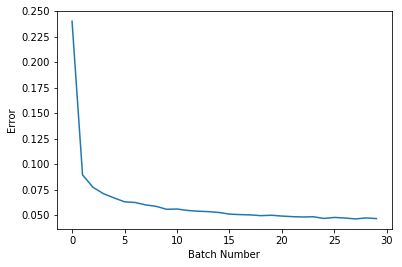

In [5]:
#Parameters
epochs = 5
batchsize = 100
weights = []
errors = []

for epoch in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={ X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={  X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={ X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
        if start % 10000 == 0:
            errors.append(sess.run(err, feed_dict={X: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
            weights.append(cur_w)
    print('Epoch: %d' % epoch,'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

[[-0.2700018  -0.23000798 -0.22500792 ... -0.23501018 -0.23500396
  -0.21001762]
 [-0.2700082  -0.23002182 -0.22661895 ... -0.23597169 -0.23501529
  -0.21002588]
 [-0.29396623 -0.23186249 -0.24121216 ... -0.24912478 -0.25174904
  -0.23518074]
 ...
 [-0.27001613 -0.23001471 -0.22502185 ... -0.23505889 -0.23501778
  -0.21006992]
 [-0.33534846 -0.3010772  -0.3159412  ... -0.35674563 -0.3735356
  -0.27403334]
 [-0.27001974 -0.23008418 -0.22503507 ... -0.23502913 -0.23504399
  -0.2104366 ]]


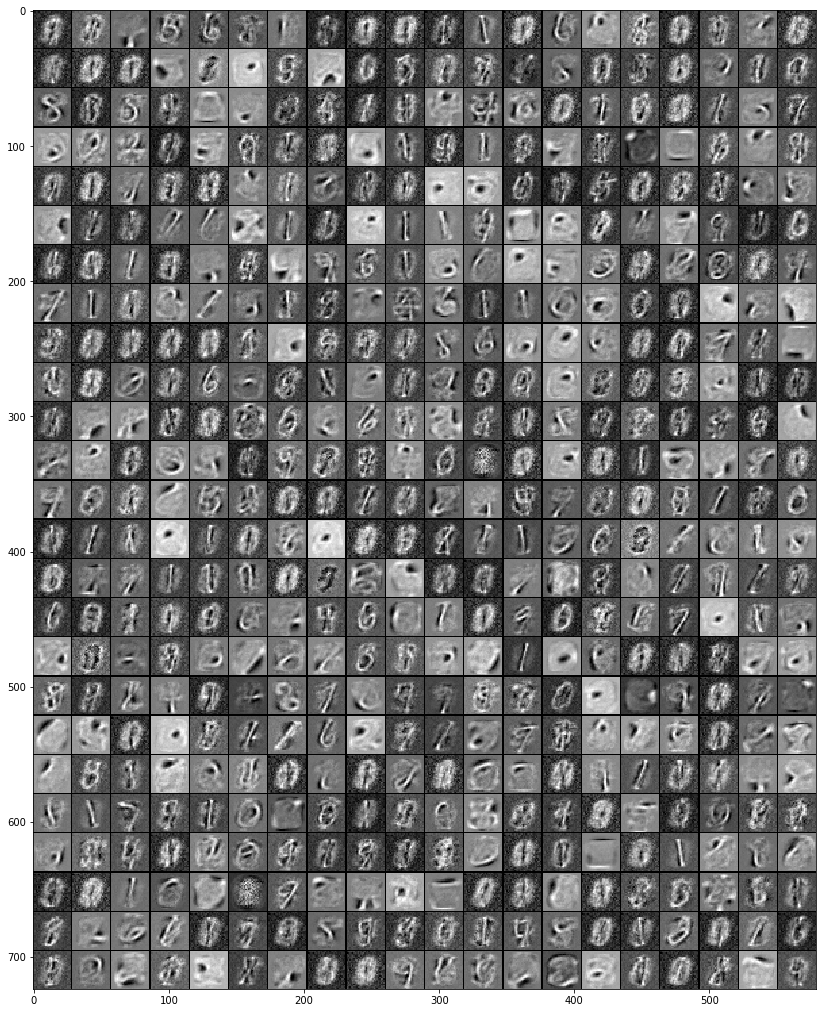

In [6]:
uw = weights[-1].T
print(uw) # a weight matrix of shape (500,784)
tile_raster_images(X=cur_w.T, img_shape=(28, 28), tile_shape=(25, 20), tile_spacing=(1, 1))
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=cur_w.T, img_shape=(28, 28) ,tile_shape=(25, 20), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

# reconstruction 

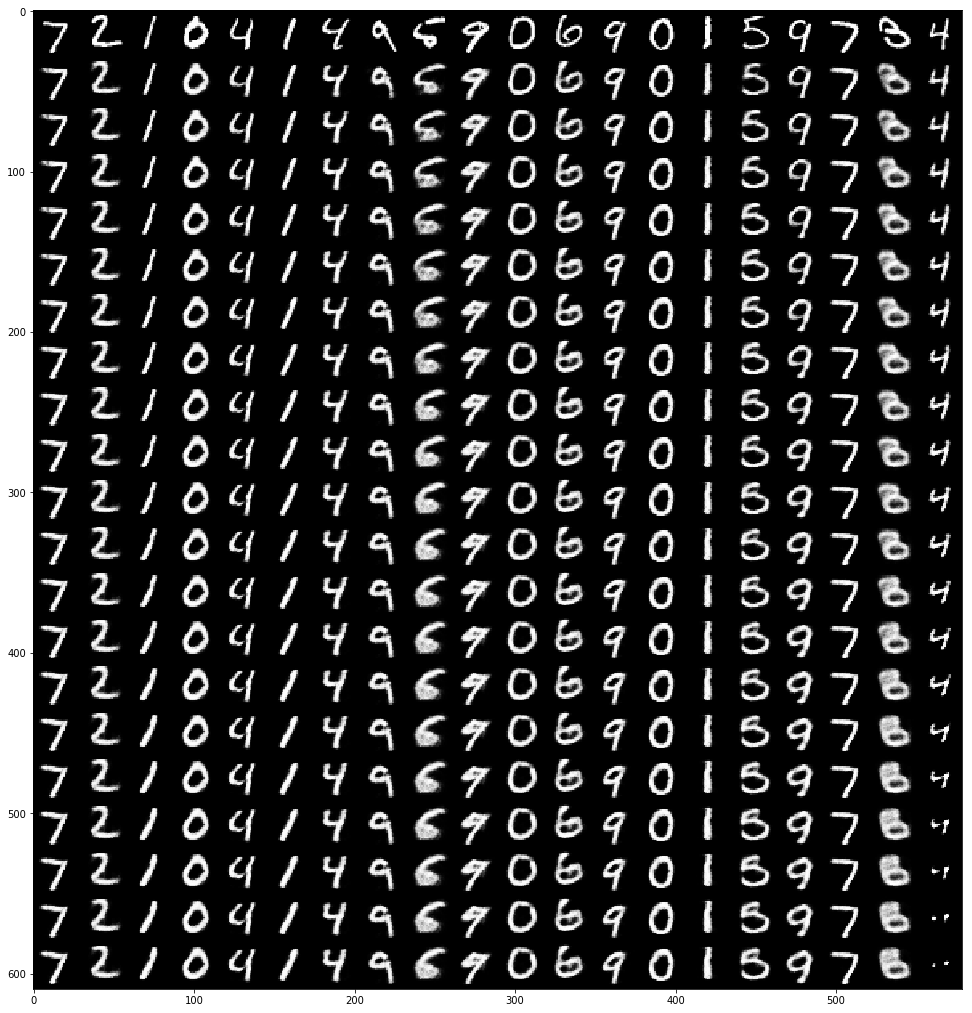

In [7]:
n_chains = 20
n_iter = 1
n_samples=20
sample_case_nomral = np.copy(teX[0:20])
# store the sampled images
image_data_normal = np.zeros((29*(n_samples+1)+1, 29*(n_chains)-1),
                  dtype="uint8")
# the original images
image_data_normal[0:28,:] = tile_raster_images(X=sample_case_nomral,
                                    img_shape=(28, 28),
                                    tile_shape=(1, n_chains),
                                    tile_spacing=(1, 1) )


hh0 = tf.nn.sigmoid(tf.matmul(X, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
for idx in range(1, n_samples+1):
    for j in range(n_iter):
        feed = sess.run(hh0, feed_dict={ X: sample_case_nomral, W: prv_w, hb: prv_hb})
        sample_case_nomral = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})
    image_data_normal[idx*29 : idx*29+28, :] = tile_raster_images(X=sample_case_nomral,
                                    img_shape=(28, 28),
                                    tile_shape=(1, n_chains),
                                    tile_spacing=(1, 1))              
image = Image.fromarray(image_data_normal)
image.save("new_original_and_{0}samples.png".format(2))

plt.figure(1)
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray') 

# Three lines of white

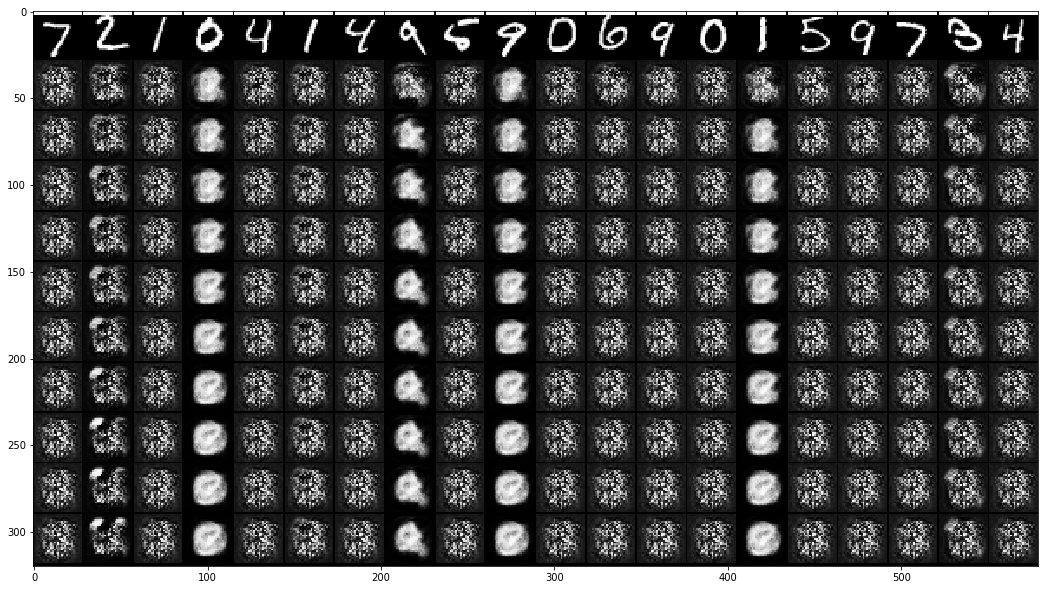

In [8]:
n_chains = 20
n_iter = 1
n_samples=10
sample_case_line = np.copy(teX[0:20])
for n in range(n_chains):
    for m in range(3*28):
        sample_case_line[n,m]=1
# store the sampled images
image_data_line = np.zeros((29*(n_samples+1)+1, 29*(n_chains)-1),
                  dtype="uint8")
# the original images
image_data_line[0:28,:] = tile_raster_images(X=sample_case_line,
                                    img_shape=(28, 28),
                                    tile_shape=(1, n_chains),
                                    tile_spacing=(1, 1) )

hh0 = tf.nn.sigmoid(tf.matmul(X, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
for idx in range(1, n_samples+1):
    for j in range(n_iter):
        feed = sess.run(hh0, feed_dict={ X: sample_case_line, W: prv_w, hb: prv_hb})
        sample_case_line = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})
    image_data_line[idx*29 : idx*29+28, :] = tile_raster_images(X=sample_case_line,
                                    img_shape=(28, 28),
                                    tile_shape=(1, n_chains),
                                    tile_spacing=(1, 1))       

           
image = Image.fromarray(image_data_line)
image.save("new_original_and_{0}samples.png".format(2))

plt.figure(1)
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray') 


# random noise

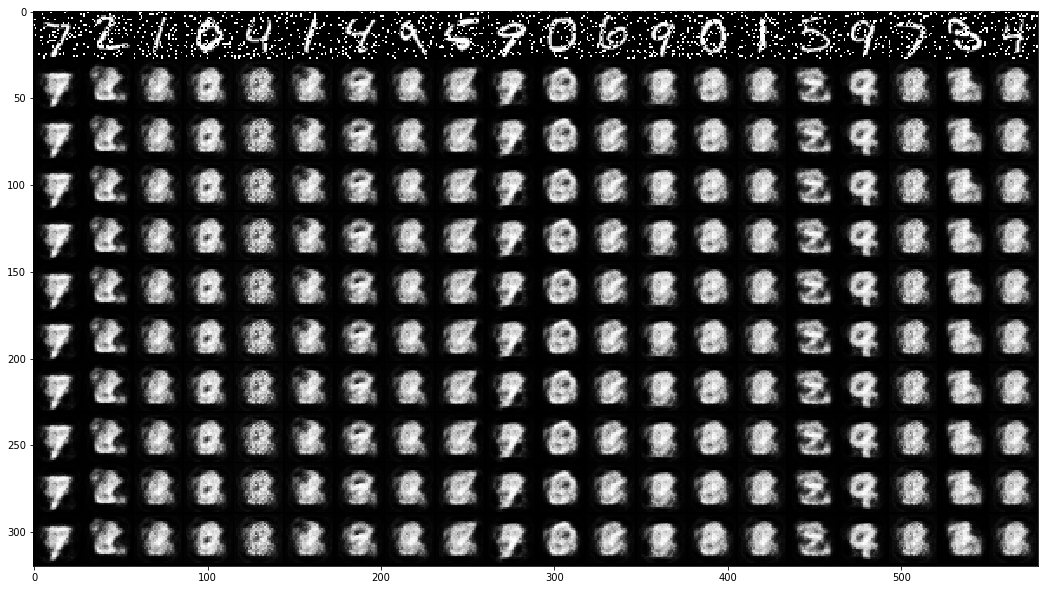

In [9]:
n_chains = 20
n_iter = 1
n_samples=10
sample_case_random = np.copy(teX[0:20])
for n in range(n_chains):
    for m in range(28*28):
        if np.random.rand()<0.1 :
            sample_case_random[n,m]=1-sample_case_random[n,m]
# store the sampled images
image_data_random = np.zeros((29*(n_samples+1)+1, 29*(n_chains)-1),
                  dtype="uint8")
# the original images
image_data_random[0:28,:] = tile_raster_images(X=sample_case_random,
                                    img_shape=(28, 28),
                                    tile_shape=(1, 20),
                                    tile_spacing=(1, 1) )


hh0 = tf.nn.sigmoid(tf.matmul(X, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
for idx in range(1, n_samples+1):
    for j in range(n_iter):
        feed = sess.run(hh0, feed_dict={ X: sample_case_random, W: prv_w, hb: prv_hb})
        rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})
    image_data_random[idx*29 : idx*29+28, :] = tile_raster_images(X=rec,
                                    img_shape=(28, 28),
                                    tile_shape=(1, n_chains),
                                    tile_spacing=(1, 1))     
    
image = Image.fromarray(image_data_random)
image.save("new_original_and_{0}samples.png".format(2))

plt.figure(1)
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray') 
